In [10]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from jax import random

In [3]:
np.random.rand(10)

array([0.85360812, 0.7656696 , 0.57905774, 0.58670639, 0.36182008,
       0.52145834, 0.60276963, 0.78719276, 0.9203495 , 0.28050727])

In [9]:
import jax.numpy as jnp
import jax

train_key = jax.random.PRNGKey(0)
jax.random.uniform(train_key, 10)

Array([0.947667  , 0.9785799 , 0.33229148, 0.46866846, 0.5698887 ,
       0.16550303, 0.3101946 , 0.68948054, 0.74676657, 0.17101455],      dtype=float32)

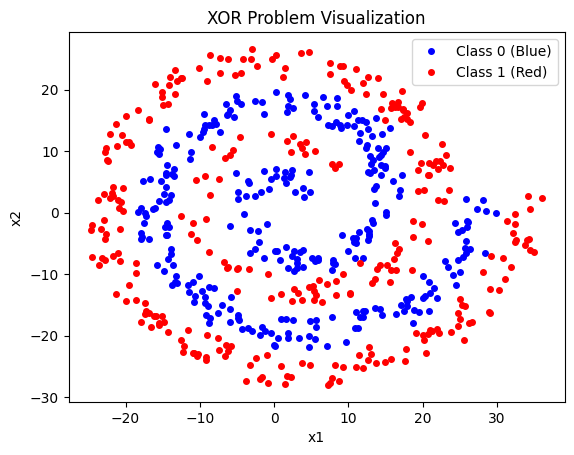

In [13]:
# Number of points
n_points = 300

# Generate random angles
t = np.sqrt(np.random.rand(n_points)) * 4 * np.pi  # angle

# Spiral 1 (class 0)
r_a = 2 * t
x1_a = r_a * np.cos(t) + np.random.rand(n_points) * 5.0  
x2_a = r_a * np.sin(t) + np.random.rand(n_points) * 5.0 

# Spiral 2 (class 1), offset by pi
r_b = 2 * t + 2 * np.pi
x1_b = r_b * np.cos(t) + np.random.rand(n_points) * 5.0  
x2_b = r_b * np.sin(t) + np.random.rand(n_points) * 5.0

# Combine both spirals
x1 = np.concatenate([x1_a, x1_b])
x2 = np.concatenate([x2_a, x2_b])

# Optional: add more features
features = np.column_stack([
    x1,
    x2,
])

# Labels: 0 for first spiral, 1 for second spiral
y = np.concatenate([np.zeros(n_points), np.ones(n_points)])

plt.plot(x1[y == 0], x2[y == 0], 'bo', label='Class 0 (Blue)', ms=4)
plt.plot(x1[y == 1], x2[y == 1], 'ro', label='Class 1 (Red)', ms=4)
plt.title('XOR Problem Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [14]:
def generate_data(key, dataset_size: int) -> Tuple[jnp.ndarray, jnp.ndarray]:
    X = random.uniform(key, (dataset_size, 5))

    # Generate random angles
    t = jnp.sqrt(X[:, 0]) * 4 * jnp.pi

    # Spiral 1 (class 0)
    r_a = 2 * t
    x1_a = r_a * jnp.cos(t) + X[:, 1] * 5.0  
    x2_a = r_a * jnp.sin(t) + X[:, 2] * 5.0 

    # Spiral 2 (class 1), offset by pi
    r_b = 2 * t + 2 * jnp.pi
    x1_b = r_b * jnp.cos(t) + X[:, 3] * 5.0  
    x2_b = r_b * jnp.sin(t) + X[:, 4] * 5.0

    X_train = jnp.concatenate([jnp.stack([x1_a, x2_a], axis=1), jnp.stack([x1_b, x2_b], axis=1)], axis=0)
    y_train = jnp.concatenate([jnp.zeros(X_train.shape[0] // 2), jnp.ones(X_train.shape[0] // 2)], axis=0)
    return X_train, y_train

In [15]:
X_train, y_train = generate_data(train_key, n_points)

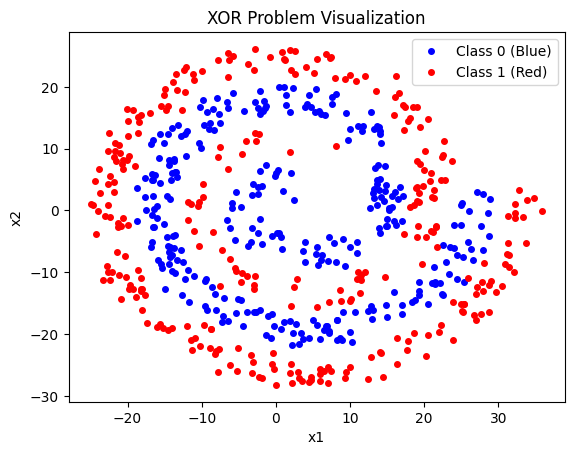

In [ ]:
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'bo', label='Class 0 (Blue)', ms=4)
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'ro', label='Class 1 (Red)', ms=4)
plt.title('XOR Problem Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()